In [7]:
# import all necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LogisticRegression

In [8]:
# import warnings library to supress any uwanted warnings due to any python library versions
import warnings
warnings.filterwarnings('ignore')

In [11]:
# import dataset using pandas read_csv func
voice_data = pd.read_csv(r"C:\Users\Admin\Desktop\GCP Self Upskilling\python-learning\Modelling\sample-dataset\voice.csv")
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [12]:
# suffile the entire data properly 
voice_data = voice_data.sample(frac=1).reset_index(drop=True)

In [16]:
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.180186,0.046692,0.177439,0.163931,0.204622,0.040691,2.946759,14.328269,0.898185,0.389866,...,0.180186,0.146992,0.016080,0.258065,1.797883,0.203125,7.000000,6.796875,0.237233,0
1,0.231768,0.038282,0.236158,0.226211,0.247947,0.021737,3.730854,20.259840,0.790508,0.164982,...,0.231768,0.204786,0.047244,0.279070,0.992506,0.023438,9.890625,9.867188,0.105010,0
2,0.155785,0.059311,0.165123,0.099534,0.197918,0.098384,2.653738,10.966038,0.908597,0.421650,...,0.155785,0.099036,0.048780,0.227273,0.609422,0.097656,2.749023,2.651367,0.247813,1
3,0.201145,0.040716,0.200799,0.183095,0.222230,0.039135,2.088522,7.113905,0.871955,0.313511,...,0.201145,0.167854,0.048387,0.271186,1.439368,0.023438,8.226562,8.203125,0.160325,0
4,0.194812,0.061826,0.180684,0.139202,0.257664,0.118462,1.784038,5.542214,0.881234,0.309330,...,0.194812,0.137508,0.048000,0.277457,1.438776,0.023438,8.414062,8.390625,0.115033,1


In [14]:
len(voice_data)

3168

In [15]:
# convert the labels from character to numiric (1 or 0) using sklearn labelencoder
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

voice_data["label"] = lb_make.fit_transform(voice_data["label"])

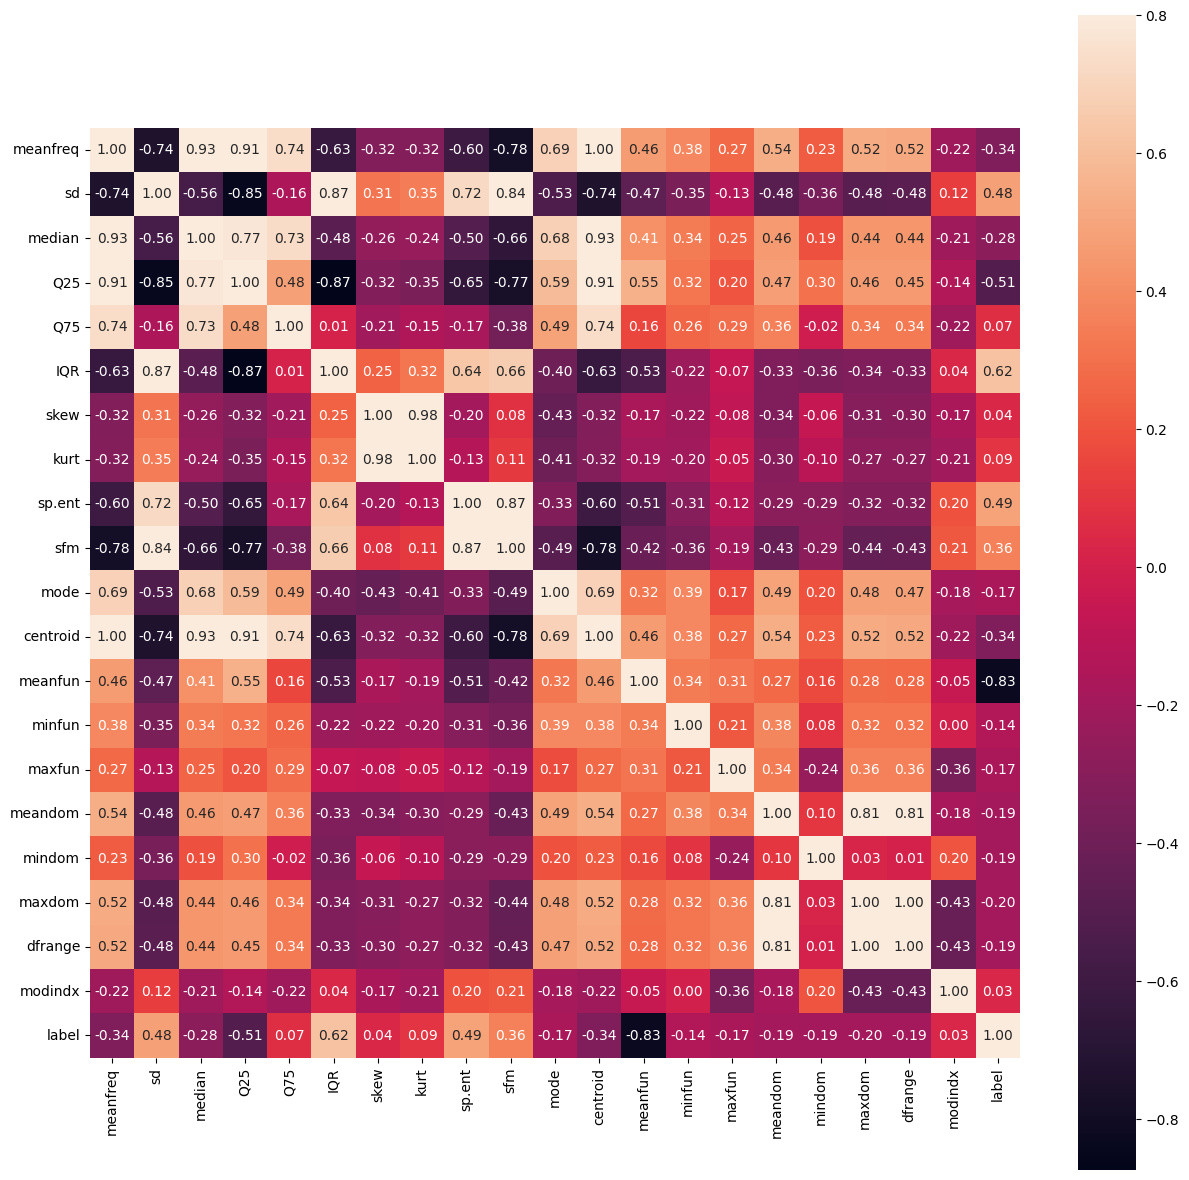

In [17]:
"""since muny variables can be highly correlated with each other so no point throwing every feature into the model but make a selection
for ex. if two variables are positevely correlated then only one variable can do the job
we do that using a heatmat and see the relation of every pair of features present in the dataset
lighter color means they are positevely correlated and darker color means they are negative correlated """


import seaborn as sns
import matplotlib.pyplot as plt

corrmat = voice_data.corr()

f,ax = plt.subplots(figsize=(15,15))

sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f')

plt.show()


In [19]:
# drop all unnecesary features after careful consideration including the lable field 

x_data = voice_data.drop(columns=['label', 'sd', 'Q25','Q75', 'kurt', 'sfm', 'centroid', 'maxdom', 'mindom', 'dfrange'])

x_data.head()

,meanfreq,median,IQR,skew,sp.ent,mode,meanfun,minfun,maxfun,meandom,modindx
0,0.180186,0.177439,0.040691,2.946759,0.898185,0.168434,0.146992,0.016080,0.258065,1.797883,0.237233
1,0.231768,0.236158,0.021737,3.730854,0.790508,0.235421,0.204786,0.047244,0.279070,0.992506,0.105010
2,0.155785,0.165123,0.098384,2.653738,0.908597,0.094740,0.099036,0.048780,0.227273,0.609422,0.247813
3,0.201145,0.200799,0.039135,2.088522,0.871955,0.183095,0.167854,0.048387,0.271186,1.439368,0.160325
4,0.194812,0.180684,0.118462,1.784038,0.881234,0.259259,0.137508,0.048000,0.277457,1.438776,0.115033


In [20]:
y_data = voice_data["label"]

In [21]:
# convert x_data and y_data into numpy arrays
x_data = np.array(x_data)
y_data = np.array(y_data)

In [22]:
# split the x_data into train and test dataset into ratio (80/20)

train_data = x_data[:-633] #80%
test_data = x_data[-633:] #20%

In [29]:
# split the y_data into train and test dataset into ratio (80/20)

train_labels = y_data[:-633] #80%
test_labels = y_data[-633:] #20%

In [36]:
# invoke logistic regression object
logisticRegr = LogisticRegression()

In [37]:
# feed training data and lebels into the model object
logisticRegr.fit(train_data,train_labels)

LogisticRegression()

In [39]:
""" we can either use predict funtion to generate predictions on test data and then compare it back with the test labels
and calculate the accurace of the model"""
# predictions = logisticRegr.predict(test_data)

In [40]:
"""or we can use score function to predict the result, comapre it back with the test labels and gives an accuracy score at the same time"""
score = logisticRegr.score(test_data,test_labels)
print(score)

0.9273301737756714
